## Дипломная работа по курсу «Python для анализа данных»

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 15,7
title_font = {'fontname':'Arial', 'size':'28', 'color':'black', 'weight':'bold'}
axis_font = {'fontname':'Arial', 'size':'24', 'weight':'ultralight'}
ticks_font = {'fontname':'Arial', 'size':'20', 'weight':'ultralight'}

import seaborn as sns

### 1. Загрузить файл hr.csv (можно найти во сложении к заданию)

In [2]:
hr_data = pd.read_csv('hr.csv')
hr_data.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [3]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### 2. Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)

In [4]:
hr_data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### 3. Рассчитать и визуализировать корреляционную матрицу для переменных

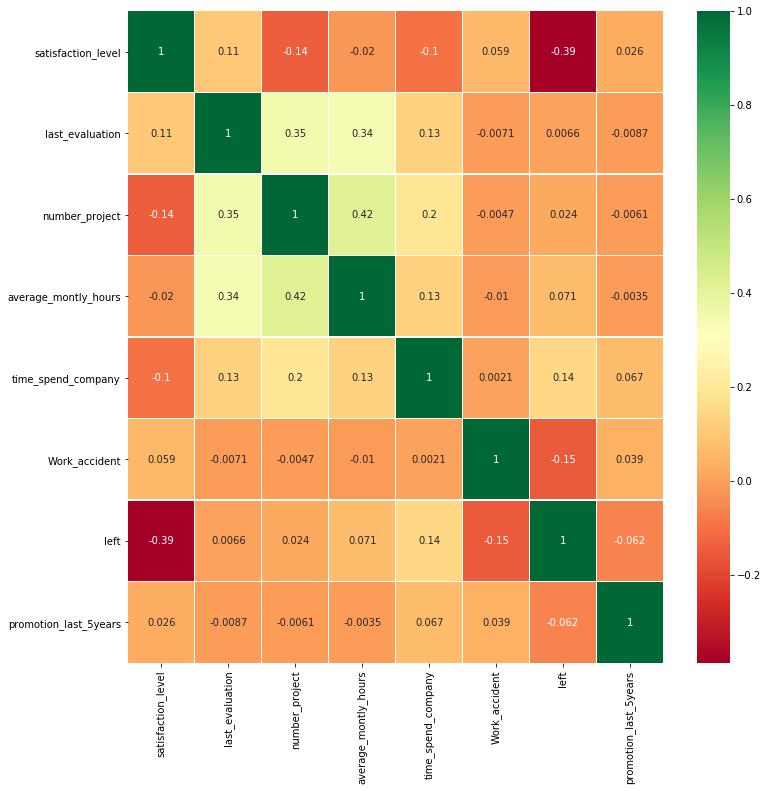

In [5]:
sns.heatmap(hr_data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

### 4. Визуализировать несколько взаимосвязей между переменными

- **Влияние уровня зарплаты и нагрузки на уровень удовлетворённости с разбивкой по департаментам** 

<Figure size 1080x504 with 0 Axes>

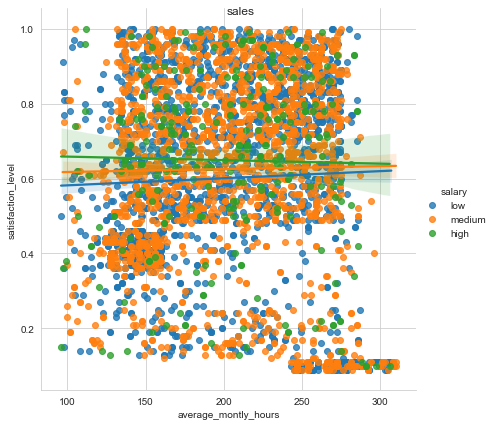

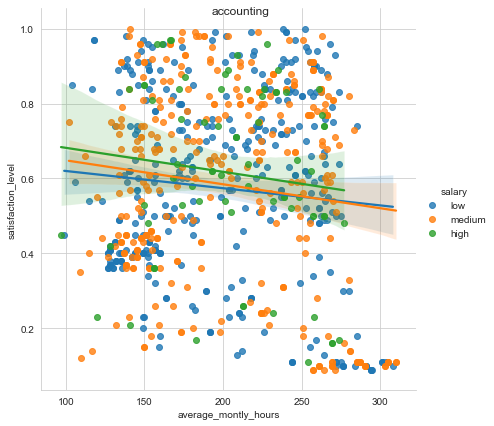

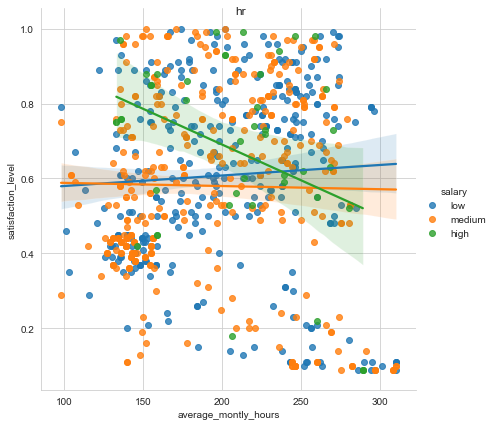

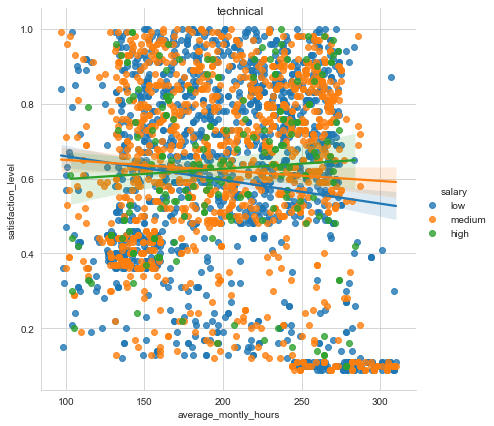

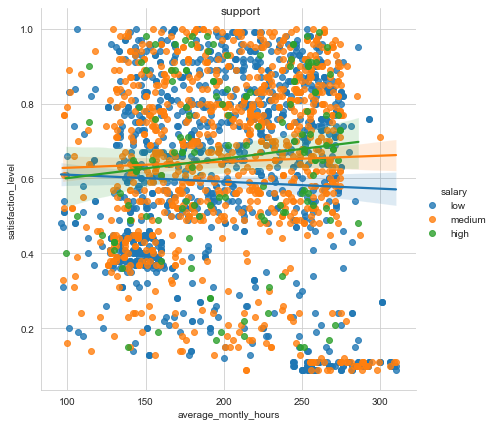

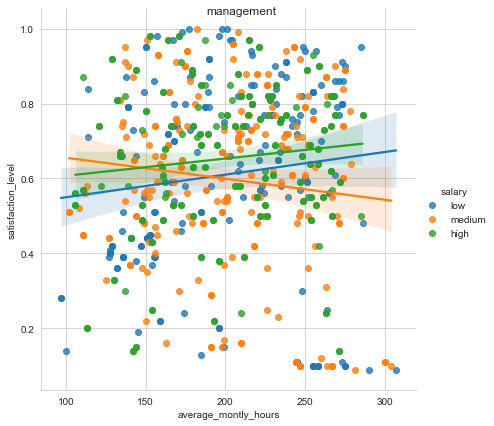

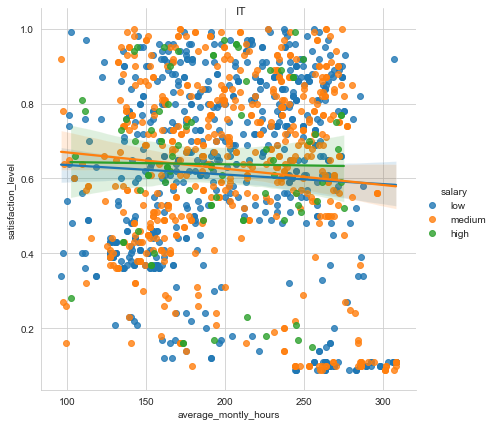

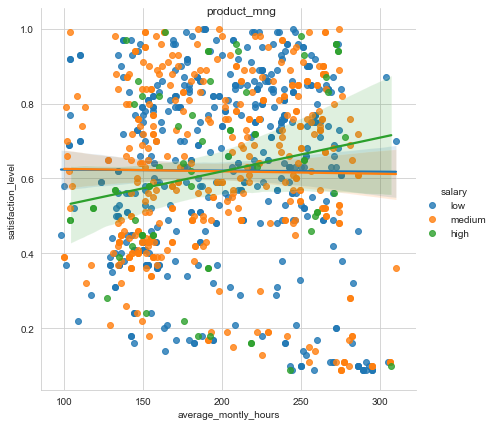

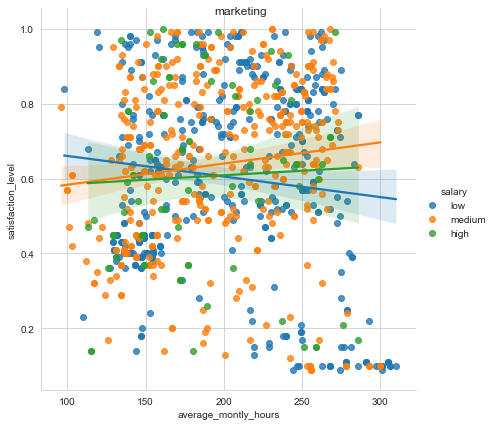

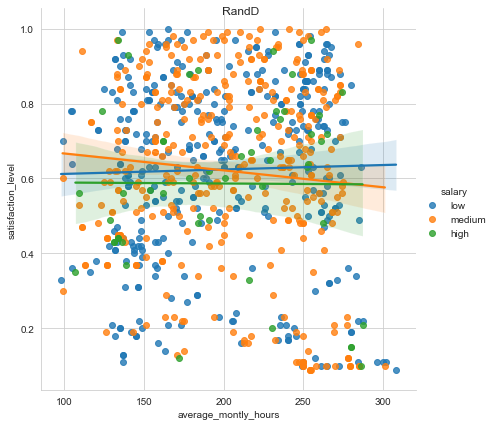

In [6]:
departments_tuple = tuple(hr_data.sales.unique())

f = plt.figure()
gs = f.add_gridspec(len(departments_tuple), 1)
sns.set_style("whitegrid")

for i, department in enumerate(departments_tuple):
    sns.lmplot(x='average_montly_hours', y='satisfaction_level', hue='salary',
               data=hr_data[(hr_data.sales == department)], height=6, aspect=1.0,
               hue_order=['low','medium','high']).fig.suptitle(department, fontsize=12)


- **статистика увольнений с группировкой по отделам**

In [34]:
hr_data_quitted_1 = hr_data[hr_data.left == 1].groupby(['sales','Work_accident']).count().left.unstack()
hr_data_quitted_1.columns = ['Voluntary_dismissal', 'Work_accident']

Text(0.5, 1.0, 'Quitted statistics')

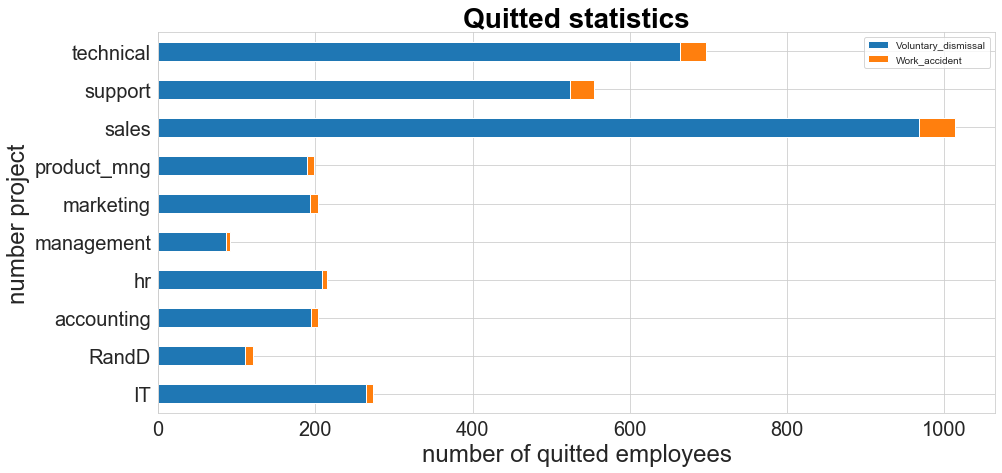

In [35]:
hr_data_quitted_1.plot.barh(rot=0, stacked=True)
plt.xticks(**ticks_font)
plt.yticks(**ticks_font)
plt.xlabel('number of quitted employees', **axis_font)
plt.ylabel('number project', **axis_font)
plt.title('Quitted statistics', **title_font)

- **Уровень удовлетворённости с разбивкой по проектам в целом**

Боксплоты с группировкой по проектам и по уровню удовлетворённости

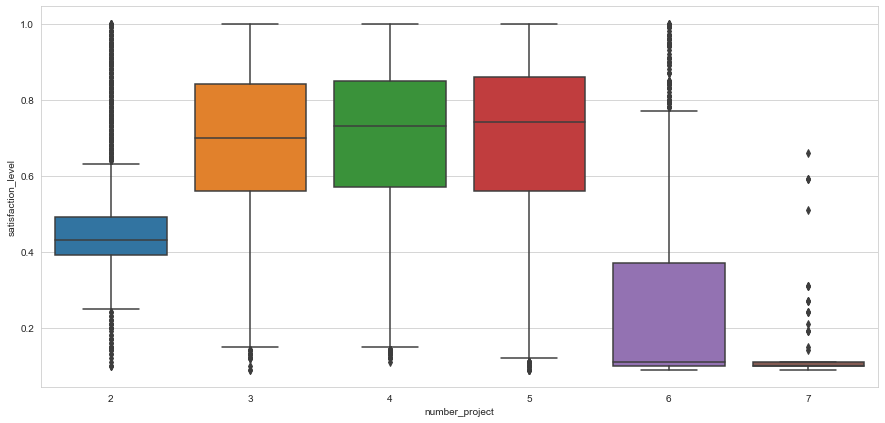

In [9]:
ax = sns.boxplot(x="number_project", y="satisfaction_level", 
            data=hr_data)

- **статистика увольнений с группировкой по проектам**

In [36]:
hr_data_quitted_2 = hr_data[hr_data.left == 1].groupby(['number_project','Work_accident']).count().left.unstack()
hr_data_quitted_2.columns = ['Voluntary_dismissal', 'Work_accident']
hr_data_quitted_2

,Voluntary_dismissal,Work_accident
number_project,,
2,1494,73
3,71,1
4,382,27
5,583,29
6,620,35
7,252,4


Text(0.5, 1.0, 'Quitted statistics')

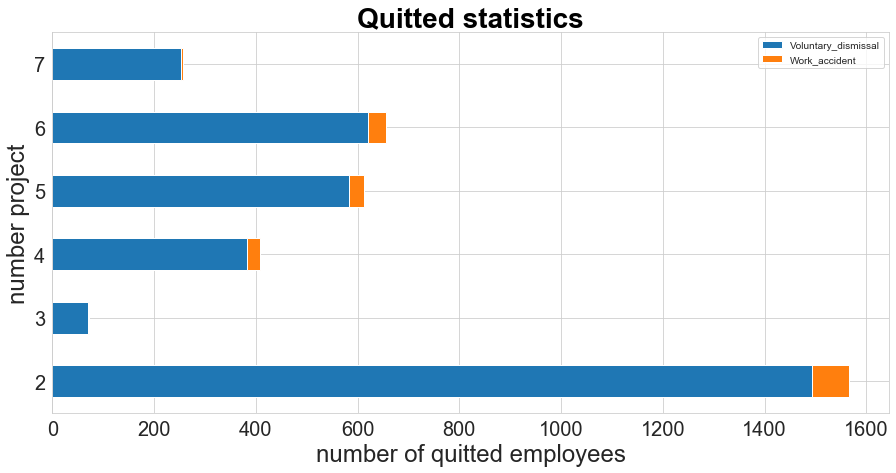

In [37]:
hr_data_quitted_2.plot.barh(rot=0, stacked=True)
plt.xticks(**ticks_font)
plt.yticks(**ticks_font)
plt.xlabel('number of quitted employees', **axis_font)
plt.ylabel('number project', **axis_font)
plt.title('Quitted statistics', **title_font)

- **Распределение показателя "Степень удовлетворённости" среди уволившихся сотрудников без дисциплинарного взыскания с распределением по уровню зарплаты**

Text(0.5, 1.0, 'Quitted statistics "satisfaction level - salary"')

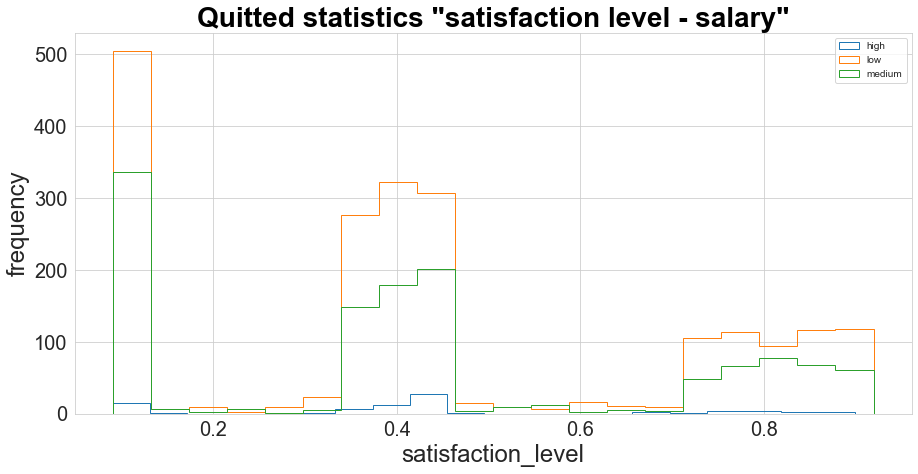

In [12]:
(
    hr_data[(hr_data.left == 1)&(hr_data.Work_accident == 0)].groupby('salary').satisfaction_level.
    plot.hist(bins=20, histtype='step', stacked=True, fill=False)
)

plt.xticks(**ticks_font)
plt.yticks(**ticks_font)
plt.xlabel('satisfaction_level', **axis_font)
plt.ylabel('frequency', **axis_font)
plt.legend()
plt.title('Quitted statistics "satisfaction level - salary"', **title_font)

- **Распределение показателя "Степень удовлетворённости" среди уволившихся сотрудников без дисциплинарного взыскания, не получивших повышение**

In [113]:
promoted_left = len(hr_data[(hr_data.left == 1)&(hr_data.promotion_last_5years==1)])
promoted_all = len(hr_data[hr_data.promotion_last_5years==1])
staid = len(hr_data[hr_data.left==0])
print(f'''Получено повышений среди уволившихся: {promoted_left}
Получено повышений всего: {promoted_all}
Всего работает сотрудников в компании: {staid}''')
      

Получено повышений среди уволившихся: 19
Получено повышений всего: 319
Всего работает сотрудников в компании: 11428


Text(0.5, 1.0, 'Quitted statistics "satisfaction level - promotion for the last 5years"')

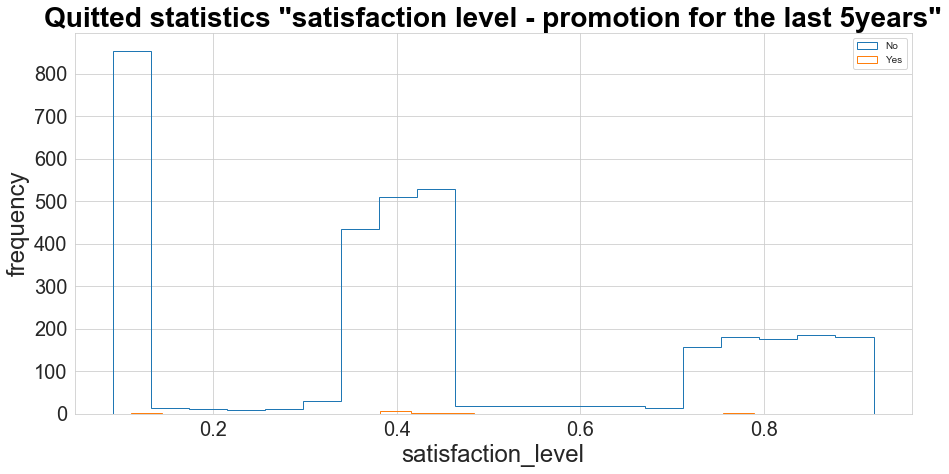

In [13]:
(
    hr_data[(hr_data.left == 1)&(hr_data.Work_accident == 0)].groupby('promotion_last_5years').satisfaction_level.
    plot.hist(bins=20, histtype='step', stacked=True, fill=False)
)

plt.xticks(**ticks_font)
plt.yticks(**ticks_font)
plt.xlabel('satisfaction_level', **axis_font)
plt.ylabel('frequency', **axis_font)
plt.legend(['No','Yes'])
plt.title('Quitted statistics "satisfaction level - promotion for the last 5years"', **title_font)

### 5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными

### Метод 1

In [14]:
from scipy import stats

for department in departments_tuple:
    print(f'Департамент {department}')
    comparison_1 = stats.ttest_ind(hr_data[(hr_data.sales == department)]['number_project'],  hr_data[(hr_data.sales == department)]['satisfaction_level'])
    print(f'Сравнение "number_project" и "satisfaction_level": t-stat= {comparison_1[0]}, p-value = {comparison_1[1]}')
    comparison_2 = stats.ttest_ind(hr_data[(hr_data.sales == department)]['last_evaluation'],  hr_data[(hr_data.sales == department)]['left'])
    print(f'Сравнение "last_evaluation" и "left": t-stat= {comparison_2[0]}, p-value = {comparison_2[1]}\n')
#     print(stats.ttest_ind(hr_data[(hr_data.sales == department)]['number_project'],  hr_data[(hr_data.sales == department)]['satisfaction_level']))

Департамент sales
Сравнение "number_project" и "satisfaction_level": t-stat= 160.47764103370346, p-value = 0.0
Сравнение "last_evaluation" и "left": t-stat= 64.58975584211261, p-value = 0.0

Департамент accounting
Сравнение "number_project" и "satisfaction_level": t-stat= 69.79662835053352, p-value = 0.0
Сравнение "last_evaluation" и "left": t-stat= 26.37342548312547, p-value = 1.0779897680440467e-126

Департамент hr
Сравнение "number_project" и "satisfaction_level": t-stat= 66.25571176851773, p-value = 0.0
Сравнение "last_evaluation" и "left": t-stat= 23.33409703728236, p-value = 9.152144113545695e-103

Департамент technical
Сравнение "number_project" и "satisfaction_level": t-stat= 132.78639467350413, p-value = 0.0
Сравнение "last_evaluation" и "left": t-stat= 51.60412405316248, p-value = 0.0

Департамент support
Сравнение "number_project" и "satisfaction_level": t-stat= 121.59687430070164, p-value = 0.0
Сравнение "last_evaluation" и "left": t-stat= 48.119089679697666, p-value = 0.0


### Метод 2

In [15]:
import researchpy as rp
rp.summary_cont(hr_data.groupby('sales')['satisfaction_level'])

,N,Mean,SD,SE,95% Conf.,Interval
sales,,,,,,
IT,1227,0.618142,0.249903,0.007134,0.604153,0.632131
RandD,787,0.619822,0.245269,0.008743,0.602675,0.636969
accounting,767,0.582151,0.255235,0.009216,0.564076,0.600226
hr,739,0.598809,0.247929,0.009120,0.580921,0.616697
management,630,0.621349,0.227747,0.009074,0.603551,0.639148
marketing,858,0.618601,0.244280,0.008340,0.602246,0.634957
product_mng,902,0.619634,0.242279,0.008067,0.603814,0.635454
sales,4140,0.614447,0.250251,0.003889,0.606823,0.622071
support,2229,0.618300,0.246406,0.005219,0.608068,0.628531


In [16]:
descriptives, results = rp.ttest(hr_data.number_project, hr_data.satisfaction_level)

descriptives

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,number_project,14999.0,3.803054,1.232592,0.010064,3.783326,3.822781
1,satisfaction_level,14999.0,0.612834,0.248631,0.002030,0.608854,0.616813
2,combined,29998.0,2.207944,1.826194,0.010544,2.187277,2.228610


In [17]:
results

,Independent t-test,results
0,Difference (number_project - satisfaction_leve...,3.1902
1,Degrees of freedom =,29996.0000
2,t =,310.7220
3,Two side test p value =,0.0000
4,Difference < 0 p value =,1.0000
5,Difference > 0 p value =,0.0000
6,Cohen's d =,3.5880
7,Hedge's g =,3.5879
8,Glass's delta =,2.5882
9,r =,0.8735


Difference < 0 p value = pvalue = 1,0000 для гипотезы, что разницы между двумя переменными отсутствует (гипотеза опровергается, имеется статистическое различие между атрибутами)

r = 0,8735 коэффициент корреляции Пирсона говорит о наличии прямой линейной взаимосвязи параметров.

In [18]:
descriptives, results = rp.ttest(hr_data.last_evaluation, hr_data.left)

descriptives

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,last_evaluation,14999.0,0.716102,0.171169,0.001398,0.713362,0.718841
1,left,14999.0,0.238083,0.425924,0.003478,0.231266,0.244899
2,combined,29998.0,0.477092,0.403087,0.002327,0.472531,0.481654


In [19]:
results

,Independent t-test,results
0,Difference (last_evaluation - left) =,0.4780
1,Degrees of freedom =,29996.0000
2,t =,127.5363
3,Two side test p value =,0.0000
4,Difference < 0 p value =,1.0000
5,Difference > 0 p value =,0.0000
6,Cohen's d =,1.4727
7,Hedge's g =,1.4727
8,Glass's delta =,2.7927
9,r =,0.5930


In [20]:
promoted = hr_data[hr_data.promotion_last_5years == 1]
not_promoted = hr_data[hr_data.promotion_last_5years != 1]
descriptives, results = rp.ttest(not_promoted.satisfaction_level, promoted.satisfaction_level)

descriptives

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,satisfaction_level,14680.0,0.611895,0.249281,0.002057,0.607862,0.615928
1,satisfaction_level,319.0,0.656019,0.212489,0.011897,0.632612,0.679426
2,combined,14999.0,0.612834,0.248631,0.002030,0.608854,0.616813


In [21]:
results

,Independent t-test,results
0,Difference (satisfaction_level - satisfaction_...,-0.0441
1,Degrees of freedom =,14997.0000
2,t =,-3.1367
3,Two side test p value =,0.0017
4,Difference < 0 p value =,0.0009
5,Difference > 0 p value =,0.9991
6,Cohen's d =,-0.1775
7,Hedge's g =,-0.1775
8,Glass's delta =,-0.1770
9,r =,0.0256


Можно заметить, что есть разница между уровнем удовлетворённости повышенных и неповышенных за последние 5 лет сотрудников.

### 6. Рассчитать сколько работников работает в каждом департаменте

In [22]:
hr_data[hr_data.left==1].sales.value_counts()

sales          1014
technical       697
support         555
IT              273
hr              215
accounting      204
marketing       203
product_mng     198
RandD           121
management       91
Name: sales, dtype: int64

### 7. Показать распределение сотрудников по зарплатам

In [23]:
salary_stats = hr_data.salary.value_counts()
salary_stats.head()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

Text(0.5, 1.0, 'Salary statistics')

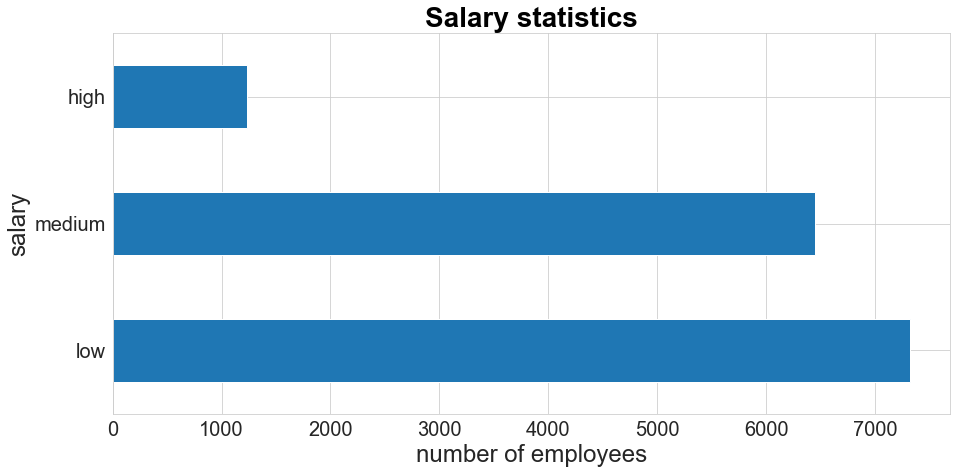

In [24]:
salary_stats.plot.barh(rot=0)
plt.xticks(**ticks_font)
plt.yticks(**ticks_font)
plt.xlabel('number of employees', **axis_font)
plt.ylabel('salary', **axis_font)
plt.title('Salary statistics', **title_font)

### 8. Показать распределение сотрудников по зарплатам совместно с департаментами

In [25]:
salary_stats_departments = hr_data.pivot_table(index = 'salary', columns = 'sales', values = 'satisfaction_level', 
                                               aggfunc = 'count', fill_value = 0)
salary_stats_departments.head()

sales,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
salary,,,,,,,,,,
high,83,51,74,45,225,80,68,269,141,201
low,609,364,358,335,180,402,451,2099,1146,1372
medium,535,372,335,359,225,376,383,1772,942,1147


Text(0.5, 1.0, 'Departments salary statistics')

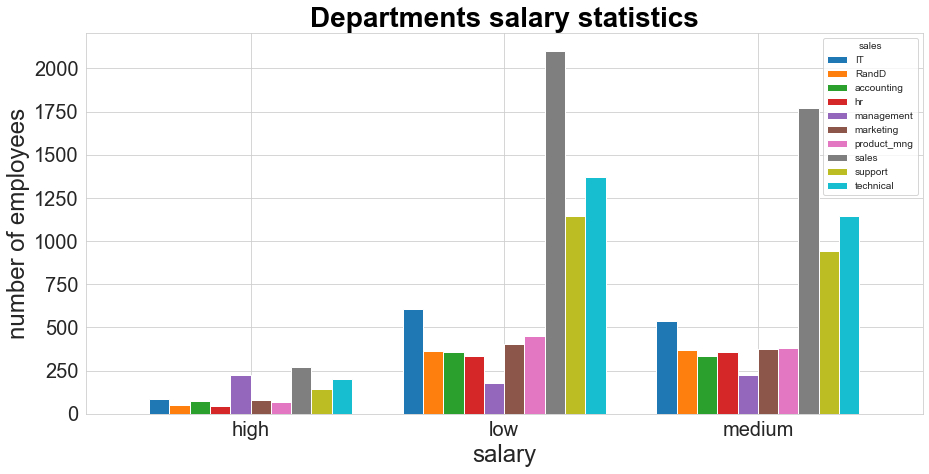

In [26]:
salary_stats_departments.plot.bar(rot=0, width = 0.8)
plt.xticks(**ticks_font)
plt.yticks(**ticks_font)
plt.xlabel('salary', **axis_font)
plt.ylabel('number of employees', **axis_font)
plt.title('Departments salary statistics', **title_font)

- **Распределение уволившихся сотрудников с группировкой по проектам и отделам**

In [104]:
number_project_stats_departments = hr_data.groupby(['number_project','left','sales']).count().satisfaction_level.unstack().unstack().fillna(0)
# hr_data_quitted.columns = ['Voluntary_dismissal', 'Work_accident']
number_project_stats_departments

sales              IT         RandD       accounting           hr         \
left                0      1      0     1          0     1      0      1   
number_project                                                             
2                68.0  114.0   41.0  46.0       35.0  91.0   31.0  109.0   
3               345.0    2.0  244.0   3.0      197.0   2.0  209.0    7.0   
4               324.0   23.0  211.0  14.0      193.0  28.0  190.0   32.0   
5               185.0   51.0  132.0  31.0      117.0  23.0   73.0   21.0   
6                32.0   63.0   38.0  14.0       21.0  45.0   21.0   33.0   
7                 0.0   20.0    0.0  13.0        0.0  15.0    0.0   13.0   

sales          management       marketing        product_mng         sales  \
left                    0     1         0      1           0     1       0   
number_project                                                               
2                    44.0  35.0      49.0  105.0        61.0  88.0   240.0   
3                   169.0   2.0     244.0    3.0       235.0   0.0  1074.0   
4                   194.0  13.0     227.0   24.0       243.0  19.0  1074.0   
5                   108.0  10.0     111.0   29.0       117.0  52.0   581.0   
6                    24.0  18.0      24.0   27.0        48.0  23.0   157.0   
7                     0.0  13.0       0.0   15.0         0.0  16.0     0.0   

sales                 support        technical         
left                1       0      1         0      1  
number_project                                         
2               477.0   112.0  238.0     140.0  264.0  
3                16.0   580.0   16.0     686.0   21.0  
4               116.0   598.0   52.0     702.0   88.0  
5               174.0   326.0  107.0     399.0  114.0  
6               164.0    58.0  116.0      96.0  152.0  
7                67.0     0.0   26.0       0.0   58.0

Text(0.5, 1.0, 'Departments salary statistics')

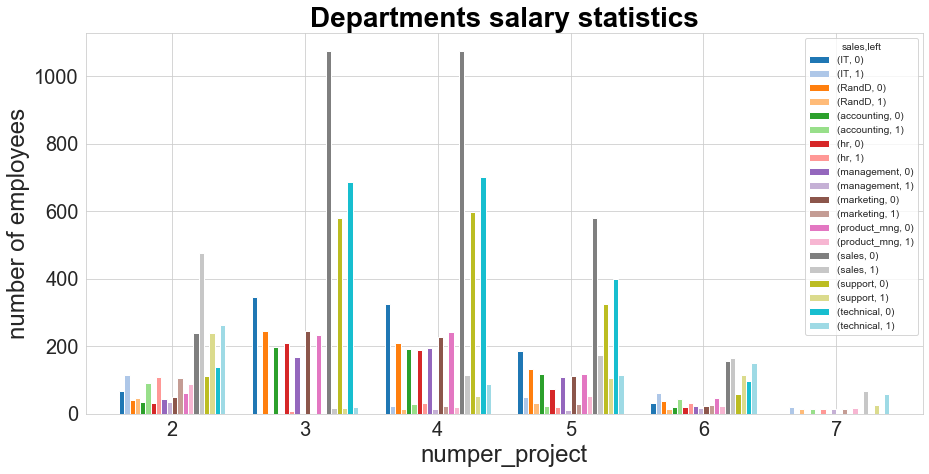

In [107]:
number_project_stats_departments.plot.bar(rot=0, width = 0.8,colormap = 'tab20')
plt.xticks(**ticks_font)
plt.yticks(**ticks_font)
plt.xlabel('numper_project', **axis_font)
plt.ylabel('number of employees', **axis_font)
plt.title('Departments salary statistics', **title_font)

### 9. Сколько сотрудников покинули компанию

In [27]:
quitted = len(hr_data[hr_data.left==1])
print(f'{quitted} сотрудников покинуло компанию.')

3571 сотрудников покинуло компанию.


### 10. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию

### Проверим гипотезу о том, что люди, которые были повышены за последние 5 лет не покинули компанию

In [28]:
descriptives, results = rp.ttest(promoted.left, not_promoted.left)

descriptives

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,left,319.0,0.059561,0.237044,0.013272,0.033449,0.085673
1,left,14680.0,0.241962,0.428286,0.003535,0.235033,0.248891
2,combined,14999.0,0.238083,0.425924,0.003478,0.231266,0.244899


In [29]:
results

,Independent t-test,results
0,Difference (left - left) =,-0.1824
1,Degrees of freedom =,14997.0000
2,t =,-7.5812
3,Two side test p value =,0.0000
4,Difference < 0 p value =,0.0000
5,Difference > 0 p value =,1.0000
6,Cohen's d =,-0.4291
7,Hedge's g =,-0.4290
8,Glass's delta =,-0.7695
9,r =,0.0618


Difference < 0 p value = 0.0000, значит, что имеется статистическое различие. Выборки не связаны между собой. 

Среднее значение по параметру left у повышенных сотрудников 0.06, у неповышенных 0.24, т.е. уволившихся сотрудников (left=0) среди повышенных меньше. Отсутствие повышения в течение 5 лет и карьерного продвижения может быть одной из причин ухода сотрудников. Однако следует иметь ввиду, что размер выборки повышенных сотрудников в разы превышает выборку неповышенных.

### Проверим гипотезу о том, что люди уходят с проекта №2 чаще (number_project)

In [30]:
project_2 = hr_data[hr_data['number_project']==2]
project_other = hr_data[hr_data['number_project']!=2]

In [31]:
descriptives, results = rp.ttest(project_2.left, project_other.left)

descriptives

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,left,2388.0,0.656198,0.475076,0.009722,0.637134,0.675262
1,left,12611.0,0.158909,0.365606,0.003256,0.152527,0.165290
2,combined,14999.0,0.238083,0.425924,0.003478,0.231266,0.244899


In [32]:
results

,Independent t-test,results
0,Difference (left - left) =,0.4973
1,Degrees of freedom =,14997.0000
2,t =,57.8597
3,Two side test p value =,0.0000
4,Difference < 0 p value =,1.0000
5,Difference > 0 p value =,0.0000
6,Cohen's d =,1.2913
7,Hedge's g =,1.2912
8,Glass's delta =,1.0468
9,r =,0.4272


Difference < 0 p value = 1.0000, указывает на наличие связи между выборками. 

Среднее значение по параметру left у сотрудников из проекта №2 - 0.66, у сотрудников из других проектов - 0.16, т.е. в основном увольняются сотрудники проекта №2.

## Выводы

Цели исследования:
- Анализ основных статистик переменных HR-датасета по сотрудникам компании.
- Определение корреляции между переменными в целом.
- Группировка данных по различным признакам и анализ взаимосвязей переменных в данных подгруппах.
- Получение общих данных о сотрудниках компании, помогающих выполнить качественный и количественный анализ данных.
- Проверка нескольких гипотез с целью установления причины кадровых проблем в компании.

Анализ данных позволил заключить следующее:
1. Средние значения переменных находятся в норме. В среднем уровень удовлетворённости всех опрошенных сотрудников составляет 0.61 (при максимальном значении 1), среднеквадратичное отклонение 0.25. Последние оценки сотрудников также высокие: среднее значение 0.72, среднеквадратичное отклонение  0.17. Показатель "количество рабочих часов в месяц" указывает что в среднем имеет место перегрузка сотрудников на 20...40 ч/мес. и более (до 85 ч/мес.): средние значения показателя 201 ч/мес, среднеквадратичное отклонение 50 ч/мес.. В основном продолжительность работы в компании составляет 3...4 года (квартили 0.25,0.75). Более 75% сотрудников компании не имели дисциплинарные взыскания и не получали повышения за последние 5 лет своей работы (т.е практически за весь карьерный период согласно данным о продолжительности работы сотрудников в компании).
1. Корреляционный анализ переменных показал, что наиболее сильная зависимость имеет место для пар переменных "уровень удовлетворённости (satisfaction level)"-"работает/покинул компанию (left)" (обратная зависимость, которая в целом очевидна) и "среднее количество рабочих часов в месяц (average monthly hours)"-"номер проекта (number project)" (прямая зависимость). Также имеет место обратная корреляция между переменными "работает/покинул компанию (left)"-"Дисциплинарное взыскание (Work accident)".
1. Выполнен детальный анализ взаимосвязи переменных, включающий:
    - анализ зависимости уровня зарплаты и нагрузки на уровень удовлетворённости с группировкой по департаментам;
    - анализ уровня удовлетворённости и статистики увольнений по дисциплинарным взысканиям с группировкой по проектам;
    - анализ распределений переменной "степень удовлетворённости" среди уволившихся сотрудников без дисциплинарного взыскания с группировкой по уровню зарплаты;
    - анализ "степени удовлетворённости" среди уволившихся сотрудников без дисциплинарного взыскания с группировкой по показателю "наличие/отсутствие повышения за 5 лет (promotion for the last 5 years)";
    - проверку взаимосвязи пар переменных "номер проекта"-"уровень удовлетворённости", "последняя оценка"-"работает/покинул компанию" с группировкой по отделам и проверку взаимосвязи "номера проекта"-"уровня удовлетворённости" с использованием t-test статистики.
            По результатам анализа установлено, что:
            - Наиболее многочисленными являются отделы менеджеров, службы поддержки и технический отдел. Также в этих отделах отмечено наибольшее количество увольнений.
            - При переработках свыше 70 часов от нормы (>250 ч/мес.) резко снижается уровень удовлетворённости сотрудников. При этом перегруженными оказываются в основном сотрудники с низкой и средней зарплатой. Поскольку вышеуказанные отделы являются самыми многочисленными, то наибольшее количество сотрудников с низким уровнем удовлетворённости выявлен именно там.
            - Увольнения после дисциплинарных взысканий составляют малый процент от общего количества увольнений. Однако при оценке их количества в различных отделах выявлено, что наиболее часто дисциплинарные взыскания имеют место в тех же отделах менеджеров, службы поддержки и техническом отделе.
            -Уровень удовлетворённости в отделах 2, 6 и 7 ниже среднего значения. 7 отдел полностью расформирован. Видимо имели место неудачная концепция, группировка сотрудников или плохая организация рабочего процесса. 6 отдел является потенциально проблемным, судя по низким значениям показателя удовлетворённости (50% отдела имеет показатель около 0.1) и большому количеству увольнений в отделах, хотя и одним из самых малочисленных из действующих на данный момент. В отделе 2 зафиксировано самое большое количество увольнений. Среднее значение уровня удовлетворённости в отделе 2 составляет около 0.45 с небольшим разбросом относительно этого значения (дельта порядка 0.05...0.07). Также во 2 отделе отмечено самое большое количество дисциплинарных взысканий (70...80), хотя по отношению к общему количеству дисциплинарных взысканий (около 1560) в отделе эта величина мала.
            - Как показал анализ распределения показателя "Степень удовлетворённости" среди уволившихся сотрудников без дисциплинарного взыскания с группировкой по уровню зарплаты имеют место три пика: 0.08...0.1, 0.36...0.47, 0.72...0.95. При этом сотрудники с низкой и средней зарплатой чаще всего ставят более низкие оценки и реже более высокие оценки. У сотрудников с высокой зарплатой пики в указанных диапазонах не так ярко выражены. Распределение оценок близко к равномерному. Наиболее часто встречается оценка 0.45 из среднего диапазона значений показателя уровня удовлетворённости.
            - Как показал анализ данных, сотрудники очень редко получают повышение. Среди уволившихся 3571 только 19 получили повышение. Среди работающих на данный момент 11428 сотрудников повышение получили только 300. Распределение показателя "Степень удовлетворённости" среди уволившихся сотрудников без дисциплинарного взыскания с группировкой по показателю "наличие повышения за последние 5 лет" имело также 3 практически совпадающих пика независимо от того был ли сотрудник повышен или нет.             
            
1. Приведены общие данные по компании:
    - Количество работающих на данный момент сотрудников в каждом департаменте;
    - Общее распределение сотрудников по зарплатам;
    - Распределение сотрудников по зарплатам с группировкой по департаментам;
    - количество сотрудников покинувших компанию.
            Данные указывают на то, что:
            - Наиболее многочисленными являются отделы менеджеров (1014 чел.), службы поддержки (555 чел.) и технический отдел (697 чел.).
            - Количество сотрудников со средней и низкой зарплатой в отдельности превышает количество сотрудников с высокой зарплатой более чем в 5 раз.
            - Анализ количества сотрудников с группировкой по зарплате и департаментам показал, что наибольший перекос в соотношении сотрудников с низкой/средней и высокой зарплатой наблюдается у менеджеров, службы поддержки, технического отдела и IT. Самое равномерное распределение у отдела менеджмента.
            - Компанию покинул 3571 сотрудник, общий штат на данный момент составляет на 11428 человек.
1. Выполнена проверка несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию. 
    - Проверка гипотезы о том, что люди, которые были повышены за последние 5 лет не покинули компанию показала, что выборки ("повышенные сотрудники", "неповышенные сотрудники") не связаны между собой. Среднее значение по параметру "работает/покинул компанию (left)" у повышенных сотрудников 0.06, у неповышенных 0.24, т.е. уволившихся сотрудников среди повышенных меньше. Отсутствие повышения в течение 5 лет и карьерного продвижения не является одной из статистически значимых причин ухода сотрудников.
    - Проверка гипотезы о том, что люди уходят с проекта №2 чаще показала, что данный данное предположение имеет основание (Difference < 0 p value = 1.0000). r=0.43 и Difference (left - left) = 0.50 указывает на схожесть трендов выборок "Уволившиеся сотрудники из проекта №2", "Уволившиеся сотрудники из других проектов" и наличие связи между данными выборками. Среднее значение по параметру left у сотрудников из проекта №2 - 0.66, у сотрудников из других проектов - 0.16, т.е. в основном увольняются сотрудники проекта №2.
    

__*Итого, согласно анализу данных, компании нужно пересмотреть мотивационную программу и график нагрузки сотрудников в отделах 2 и 6 для менеджеров, службы поддержки, технического отдела и IT.*__